In [18]:
%pip install matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.8 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch # type: ignore
from diffusers import StableDiffusion3Pipeline # type: ignore

# 로컬에 저장된 모델 불러오기
save_path = "/home/oss_1/MinsuKim/stable-diffusion-3.5-model"
pipe = StableDiffusion3Pipeline.from_pretrained(save_path, torch_dtype=torch.bfloat16).to("cuda")

2024-11-09 19:16:27.242631: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-09 19:16:27.328814: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-09 19:16:29.384680: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
img_prompt = "cocacola logo" #입력 프롬프트
img_name = "example" #저장 시 이미지 파일 이름
img_count = 3; #생성할 이미지 개수

imageList = pipe(
    img_prompt,
    negative_prompt = "blurry image",
    num_images_per_prompt = img_count,
    num_inference_steps=40,
    guidance_scale=15,
    height=1024,
    width=1024,
).images

for idx, image in enumerate(imageList):  # idx를 사용하기 위해 enumerate 사용
    image.save(f"image_{idx}.png")  # 파일 이름에 idx 추가


  0%|          | 0/40 [00:00<?, ?it/s]

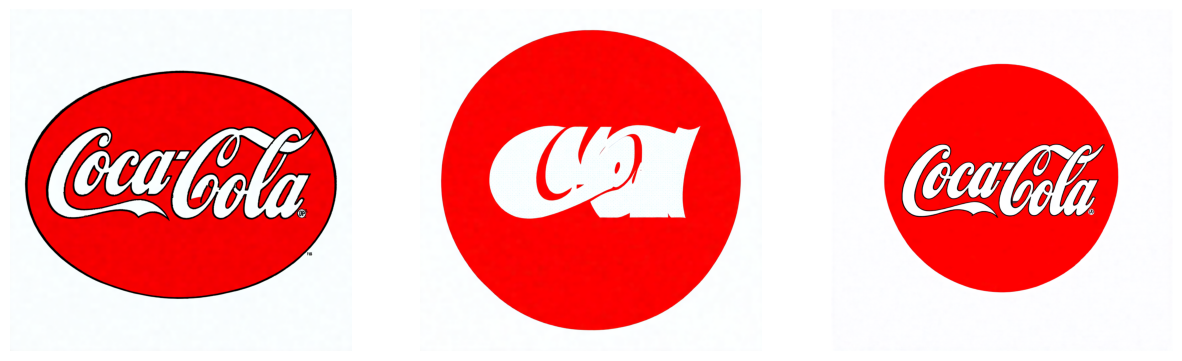

In [3]:
import matplotlib.pyplot as plt  # type: ignore

import numpy as np  # type: ignore

# 이미지들을 합쳐서 보여주기
fig, axes = plt.subplots(1, img_count, figsize=(img_count * 5, 5))  # img_count 만큼의 서브플롯 생성
for idx in range(img_count):  # img_count 만큼 반복
    axes[idx].imshow(imageList[idx])  # 각 이미지를 서브플롯에 출력
    axes[idx].axis('off')  # 축 숨기기
plt.show()  # 이미지 표시